<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Deutsch-Joza

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_5329/3406932148.py:17: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


Funciones auxiliares

In [2]:
def count_to_digital_values(counts):
    data=list(counts.items())
    sorted_by_bitstring = sorted(data, key=lambda tup: tup[0][1:])

    print('INPUT------OUTPUT-----count----percent')
    suma_total=sum([e[1] for e in sorted_by_bitstring])
    for e in sorted_by_bitstring:
        print(e[0][1:],'------',e[0][0],'-----',e[1],'-----',e[1]/suma_total)
    print('shots totales', suma_total)

def get_probabilities(svector):
    return np.power(np.abs(svector.data),2)

def get_phases(svector):
    return np.array([math.degrees(cmath.polar(c)[1]) for c in svector.data])

# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que sea balanceada o constante:

- balanceada: con una funcion de paridad o suma binaria
- constante: que devuelva siempre 0 o siempre 1

## Oráculo con funcion balanceada

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida como una suma binaria o funcion de paridad.

Ejecuta el circuito y construye el histograma de resultados

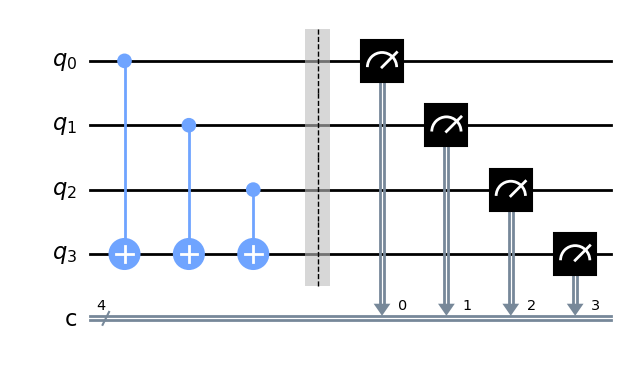

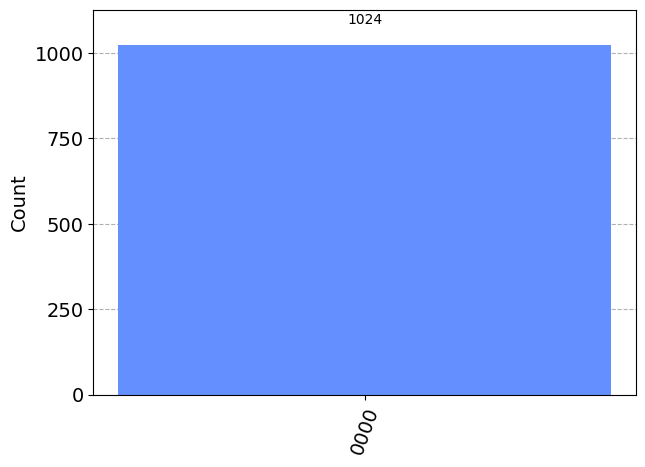

In [3]:
#BALANCEADA
#construimos un circuito de n+1 qubits con n bits de entrada y uno de salida que calcule la funcion paridad o suma binaria

n=3
#creamos el circuito
oracle_qc = QuantumCircuit(n+1,n+1)
for qubit in range(n):
    oracle_qc.cx(qubit,n)
    
oracle_qc.barrier()

#ponemos las puertas de medida
for i in range(n+1):
    oracle_qc.measure(i, i)

#lo dibujamos
display(oracle_qc.draw('mpl'))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
counts=backend.run(oracle_qc).result().get_counts()
display(plot_histogram(counts))

Si ponemos los n __qubits del input__ en superposicion vemos como es la funcion binaria balanceada. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```



funcion balanceada


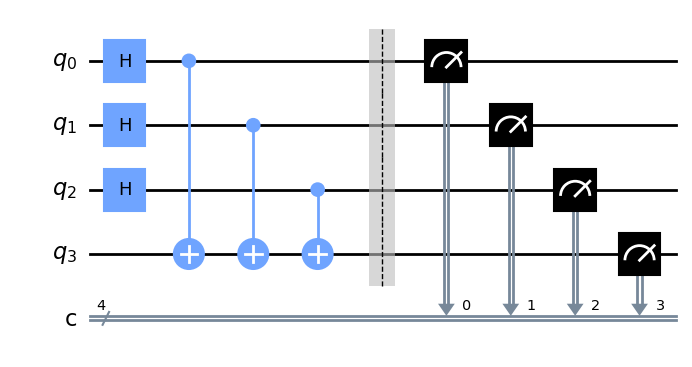

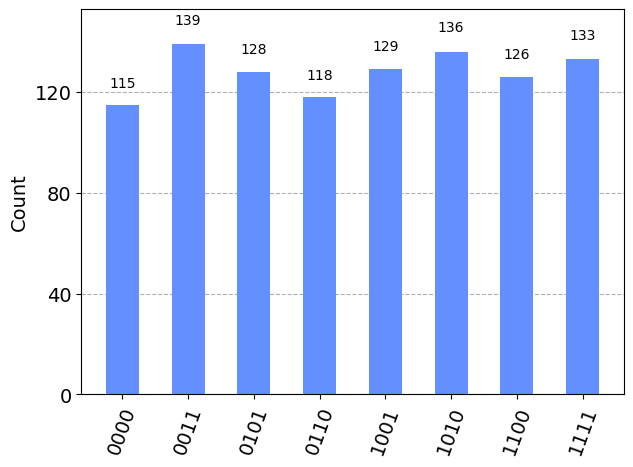

In [5]:
n=3
#creamos el circuito
oracle_qc = QuantumCircuit(n+1,n+1)

#ejecucion todas las entradas posibles de input en paralelo
for qubit in range(n):
    oracle_qc.h(qubit)

for qubit in range(n):
    oracle_qc.cx(qubit,n)

oracle_qc.barrier()

#ponemos las puertas de medida
for i in range(n+1):
    oracle_qc.measure(i, i)

#lo dibujamos
print("funcion balanceada")
display(oracle_qc.draw('mpl'))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
counts=backend.run(oracle_qc).result().get_counts()
display(plot_histogram(counts))

Veamoslo como valores de entrada y salida digitales

In [10]:
#representacion de la salida en el formato especificado
count_to_digital_values(counts)

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 146 ----- 0.142578125
001 ------ 1 ----- 125 ----- 0.1220703125
010 ------ 1 ----- 128 ----- 0.125
011 ------ 0 ----- 128 ----- 0.125
100 ------ 1 ----- 124 ----- 0.12109375
101 ------ 0 ----- 113 ----- 0.1103515625
110 ------ 0 ----- 133 ----- 0.1298828125
111 ------ 1 ----- 127 ----- 0.1240234375
shots totales 1024


## Oraculo con funcion constante

Creamos una funcion binaria constante. Vamos a seleccionar aleatoriamente si queremos que la salida sea siempre 0 o siempre 1

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida constante como 0 ó 1.

Calcula un numero aleatorio y en funcion de este numero, decide si la salida será 0 ó 1

Ejecuta el circuito poniendo todos los qubits de entrada en superposicion, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 0 ----- 136 ----- 0.1328125
010 ------ 0 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 0 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 0 ----- 142 ----- 0.138671875
shots totales 1024
```

funcion constante output siempre 1


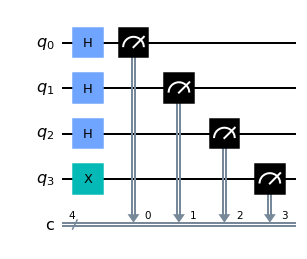

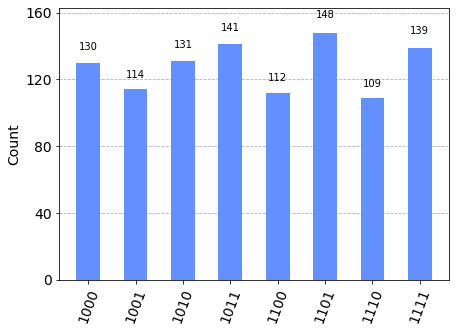

INPUT------OUTPUT-----count----percent
000 ------ 1 ----- 130 ----- 0.126953125
001 ------ 1 ----- 114 ----- 0.111328125
010 ------ 1 ----- 131 ----- 0.1279296875
011 ------ 1 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 112 ----- 0.109375
101 ------ 1 ----- 148 ----- 0.14453125
110 ------ 1 ----- 109 ----- 0.1064453125
111 ------ 1 ----- 139 ----- 0.1357421875
shots totales 1024


In [ ]:
n=3
#creamos el circuito
oracle_qc = QuantumCircuit(n+1,n+1)

#ejecucion todas las entradas posibles de input en paralelo
for qubit in range(n):
    oracle_qc.h(qubit)

#codificamos todo 1's o todo 0's a la salida de forma aleatoria
output= np.random.randint(2)  #-> genera aleatoriamente un num entero 0 o 1
if output==1:
    print("funcion constante output siempre 1")
    oracle_qc.x(n)
else:
    print("funcion constante output siempre 0")

#ponemos las puertas de medida
for i in range(n+1):
    oracle_qc.measure(i, i)

#lo dibujamos
display(oracle_qc.draw('mpl'))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
counts=backend.run(oracle_qc).result().get_counts()

#mostramos histograma resultado
display(plot_histogram(counts))
#mostramos la ejecucion de la funcion en binario
count_to_digital_values(counts)

## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo, si balanceado o constante (con 0's o 1's)

### EJERCICIO

Crea una funcion de oráculo que devuelva un circuito que computa una funcion constante o balanceada de forma aleatoria

In [11]:
def dj_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(n+1,n+1)

    #sorteamos el tipo de funcion del oraculo 0=constante y 1=balanceada
    tipo= np.random.randint(2)  #-> genera aleatoriamente un num entero 0 o 1

    #Caso de un oraculo constante
    if tipo== 0:
        #codificamos todo 1's o todo 0's a la salida de forma aleatoria
        output= np.random.randint(2) #-> genera aleatoriamente un num entero 0 o 1
        if output==1:
            print("funcion constante output siempre 1")
            oracle_qc.x(n)
        else:
            print("funcion constante output siempre 0")

    #Caso de un oraculo balanceado
    if tipo == 1:
        print("funcion balanceada")
        #We apply controlled-NOT gates for each qubit, using the
        #output qubit as the target
        for qubit in range(n):
            oracle_qc.cx(qubit,n)

    oracle_qc.name = 'DJ-Oracle' #to show in the display circuit
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

funcion balanceada


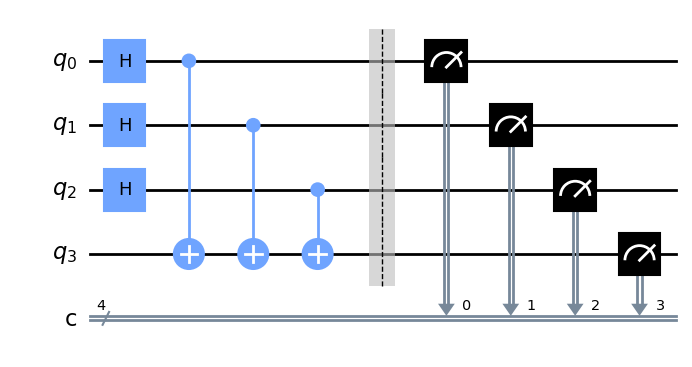

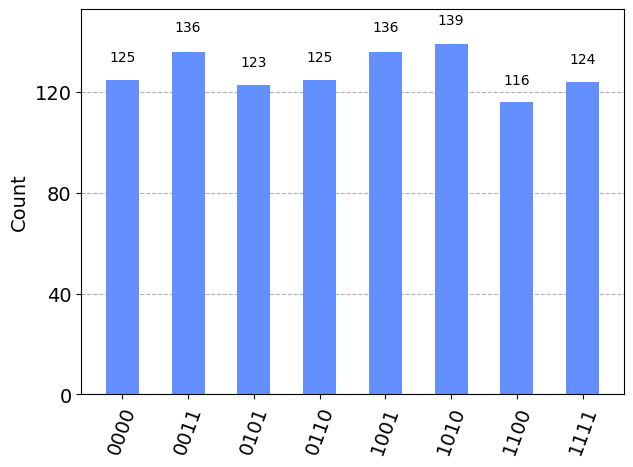

INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 125 ----- 0.1220703125
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 139 ----- 0.1357421875
011 ------ 0 ----- 136 ----- 0.1328125
100 ------ 1 ----- 116 ----- 0.11328125
101 ------ 0 ----- 123 ----- 0.1201171875
110 ------ 0 ----- 125 ----- 0.1220703125
111 ------ 1 ----- 124 ----- 0.12109375
shots totales 1024


In [14]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

# Le añadimos el oráculo con funcion aleatoria
new_circuit = circuit.compose(dj_oracle(n),range(n+1))

new_circuit.barrier()

#ponemos las puertas de medida
for i in range(n+1):
    new_circuit.measure(i, i)

#Mostramos el circuito
display(new_circuit.draw())

backend = Aer.get_backend('aer_simulator')
#results = execute(new_circuit, backend=backend).result()
#counts = results.get_counts()
counts=backend.run(new_circuit).result().get_counts()

#mostramos histograma resultado
display(plot_histogram(counts))
#mostramos la ejecucion de la funcion en binario
count_to_digital_values(counts)

# Ejecucion del Algoritmo de Deusch-Jozsa

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector

In [15]:
def svector_viz(qc):
    #tomamos un circuito sin medidas
    #medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    qc.save_statevector()
    #ejecutamos en el simulador
    backend = Aer.get_backend('aer_simulator')
    results=backend.run(qc).result()    
    #obtenemos el vector de estados resultado
    psi=results.get_statevector()
    #imprimimos el vector en latex
    display(array_to_latex(psi))
    #imprimimos las probabilidades de cada estado de la base
    display('probabilities',get_probabilities(psi))
    #imprimimos las pases de cada estado de la base
    display('phases',get_phases(psi))
    #visualizamos el plot_bloch_multivector
    display(plot_bloch_multivector(psi,reverse_bits=True))  
    
    

Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

funcion balanceada


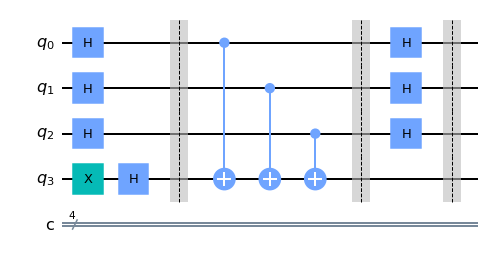

<IPython.core.display.Latex object>

'probabilities'

array([3.08148791e-33, 1.54074396e-33, 7.59645420e-64, 1.42006514e-32,
       3.48838745e-64, 1.57413953e-32, 1.42006514e-32, 5.00000000e-01,
       1.73333695e-33, 1.54074396e-33, 1.92592994e-34, 1.42006514e-32,
       1.92592994e-34, 1.57413953e-32, 1.13117565e-32, 5.00000000e-01])

'phases'

array([ 1.80000000e+02,  0.00000000e+00,  2.65650512e+01,  2.13053826e+01,
        4.87042801e+01,  2.01878656e+01,  2.13053826e+01, -1.75417732e-14,
        1.80000000e+02, -1.80000000e+02, -7.63333124e-14, -1.58694617e+02,
       -6.80092214e-14, -1.59812134e+02, -1.55977225e+02,  1.80000000e+02])

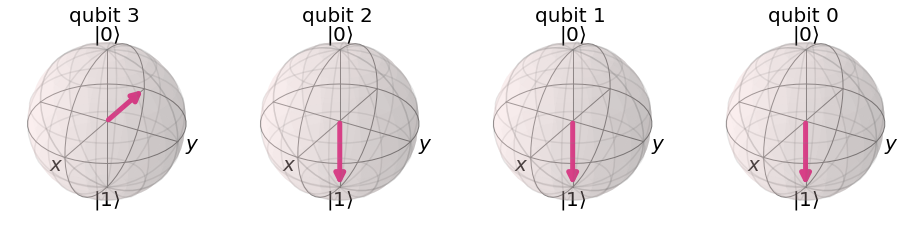

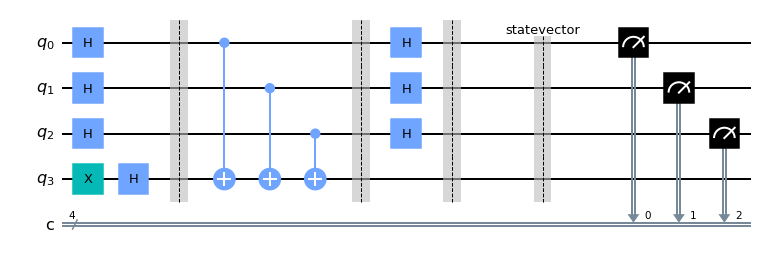

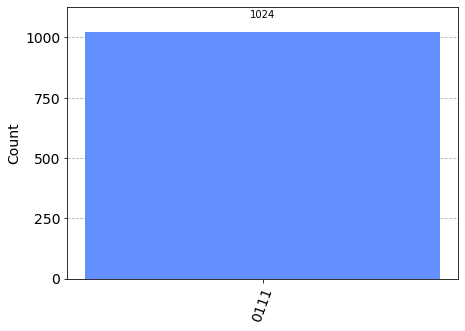

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier(range(n+1))

#descomentar para mostrar el circuito y vector de estados en este paso
#display(circuit.draw())
#svector_viz(circuit)
'''
# PASO 2- Le añadimos el oráculo con funcion aleatoria
new_circuit = circuit.compose(dj_oracle(n),range(n+1))
new_circuit.barrier(range(n+1))


#descomentar para mostrar el circuito y vector de estados en este paso
#display(new_circuit.draw())
#svector_viz(new_circuit)


#PASO 3 - Le añadimos las puertas Hadamard
for i in range(n):
    new_circuit.h(i)

new_circuit.barrier(range(n+1))

#descomentar para mostrar el circuito y vector de estados en este paso
#display(new_circuit.draw())
#svector_viz(new_circuit)


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
for i in range(n):
    new_circuit.measure(i, i)


#Mostramos el circuito
display(new_circuit.draw())

backend = Aer.get_backend('aer_simulator')
counts=backend.run(new_circuit).result().get_counts()

#mostramos histograma resultado
display(plot_histogram(counts))
'''

# Ejecucion en un Simulador con ruido


### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

funcion constante output siempre 1


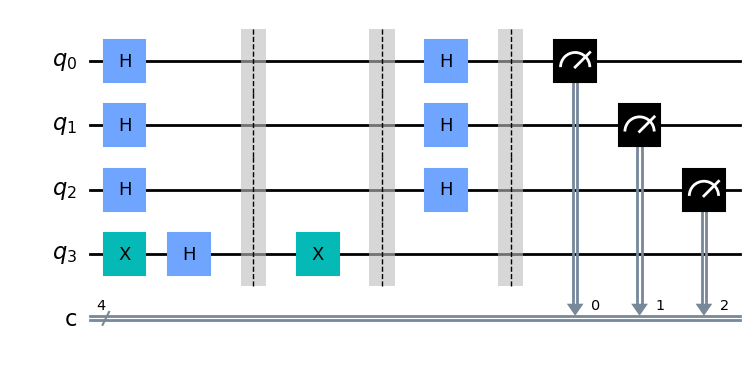

In [16]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier(range(n+1))

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = circuit.compose(dj_oracle(n),range(n+1))
dj_circuit.barrier(range(n+1))


#PASO 3 - Le añadimos las puertas Hadamard
for i in range(n):
    dj_circuit.h(i)
dj_circuit.barrier(range(n+1))


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
for i in range(n):
    dj_circuit.measure(i, i)


#Mostramos el circuito
display(dj_circuit.draw())

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Detsch-Joza

Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.

In [17]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

#creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

Transpilamos el circuito y lo ejecutamos en el simulador

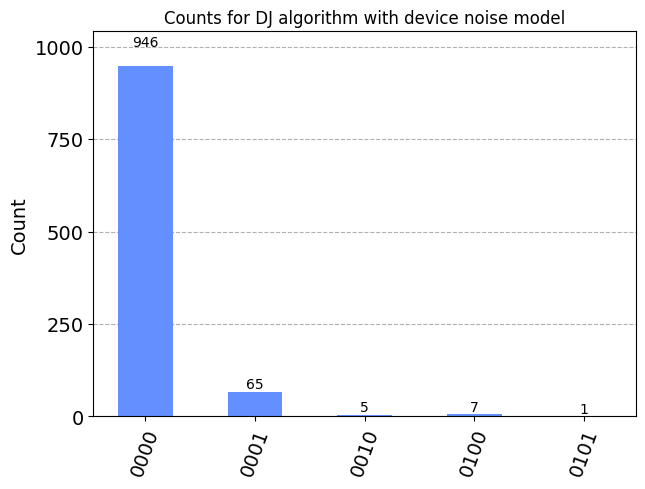

In [18]:
# Transpilamos el circuito para mapearlo a las puertas ruidosass
tcirc = transpile(dj_circuit, sim_vigo)

# Ejecutamos el circuito y obtenemos el resultado
result_noise = sim_vigo.run(dj_circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for DJ algorithm with device noise model")

# Ejecucion en un BackEnd cuántico real


### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

funcion constante output siempre 1


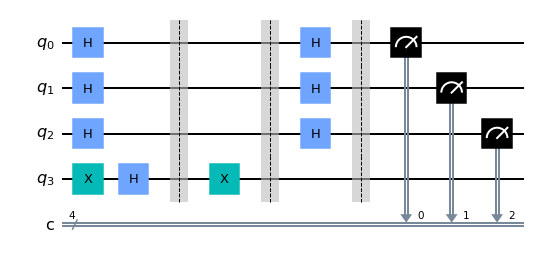

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier(range(n+1))

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = circuit.compose(dj_oracle(n),range(n+1))
dj_circuit.barrier(range(n+1))


#PASO 3 - Le añadimos las puertas Hadamard
for i in range(n):
    dj_circuit.h(i)
dj_circuit.barrier(range(n+1))


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
for i in range(n):
    dj_circuit.measure(i, i)


#Mostramos el circuito
display(dj_circuit.draw())

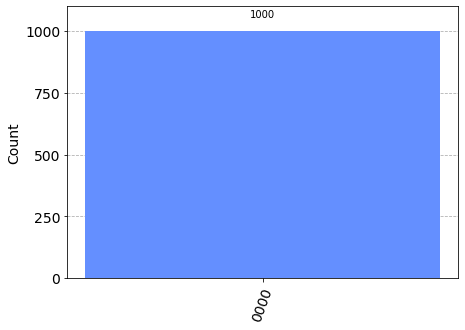

In [ ]:
# use local simulator
backend = Aer.get_backend('aer_simulator')
shots = 1000  # up to 65536
#dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

Elejimos un backend que tenga pocos jobs en la cola de ejecucion

In [ ]:
# using a real qc backend: lest busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) \
                                      and not x.configuration().simulator \
                                      and x.status().operational == True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [ ]:
# using a real backend by name
backend = provider.get_backend(name='ibmq_XXXX')
print("selected backend: ", backend)

Traceback (most recent call last):
  Input In [14] in <cell line: 2>
    backend = provider.get_backend(name='ibmq_XXXX')
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/provider.py:55 in get_backend
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [ ]:
shots = 20000
%qiskit_job_watcher
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)  #optimiza automaticamente para el layout map de qubits (coge el layout optimio y simplifica puertas si puede hacerlo)
# layout = [0, 4, 2, 3, 1]   # hanoi
# job = execute(dj_circuit, backend=backend, shots=shots, initial_layout=layout, optimization_level=3)
print('backend: ', backend)
print(job.job_id())

In [ ]:
# Para comprobar los resultados de un job id
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend = provider.get_backend('ibmq_belem')
old_job = backend.retrieve_job('635a55fb7a93ee4ecee25143')

results = old_job.result()
counts = results.get_counts()
plot_histogram(counts)

Y cuando termine la ejecucion, consultaremos el resultado